# 🧠 Predict Heart Disease Using Logistic Regression

### Import Libraries

In [1]:
import joblib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### 🔍 Step 1: Explore the Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### ⚙️ Step 2: Exploratory Data Analysis

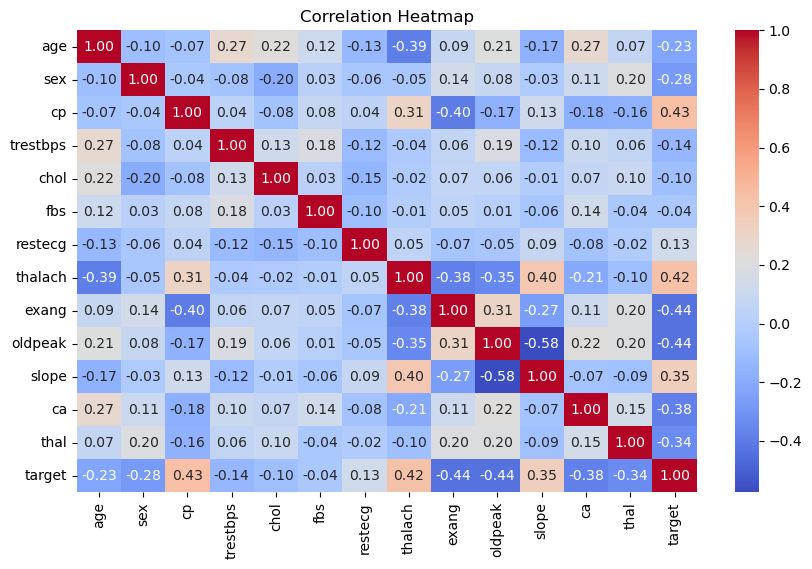

In [5]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

#### Most Positively Correlated Features

In [6]:
corr_matrix = df.corr()

target = 'target'

corr_with_target = corr_matrix[target].sort_values(ascending=False)

print("Most Positively Correlated Features:")
print(corr_with_target.head(6))

Most Positively Correlated Features:
target     1.000000
cp         0.434854
thalach    0.422895
slope      0.345512
restecg    0.134468
fbs       -0.041164
Name: target, dtype: float64


#### Most Negatively Correlated Features

In [7]:
print("Most Positively Correlated Features:")
print(corr_with_target.tail(5))

Most Positively Correlated Features:
sex       -0.279501
thal      -0.337838
ca        -0.382085
exang     -0.438029
oldpeak   -0.438441
Name: target, dtype: float64


### ⚙️ Step 3: Prepare the Data

In [8]:
# Split features and target
X = df[["cp","thalach","slope","restecg","fbs","sex","thal","ca","exang","oldpeak"]]
y = df["target"]

In [9]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 🤖 Step 4: Train the Model

In [11]:
# Train logistic regression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

### 📊 Step 5: Evaluate the Model

In [12]:
# Predict
y_pred = model.predict(X_test_scaled)

In [13]:
# Evaluate
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [14]:
print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)

Accuracy: 0.824390243902439

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.74      0.81       102
           1       0.78      0.91      0.84       103

    accuracy                           0.82       205
   macro avg       0.83      0.82      0.82       205
weighted avg       0.83      0.82      0.82       205



### 📊 Step 6: Save the Model

In [15]:
joblib.dump(model, 'heart_model.joblib')

['heart_model.joblib']

### ✅ Done! You've built a working heart disease predictor!